# Init

In [ ]:
import os

# connect to GDrive
from google.colab import drive
drive.mount('/content/drive')

# default values, that can be modified by the notebook user depending on his preferences
def print_path_info(path):
    print(path, 'exists' if os.path.exists(path) else 'doesn\'t exist')
    
# home_path = os.path.expanduser('~')
# print_path_info(home_path)

# desktop_path = os.path.join(home_path, 'Desktop')
# print_path_info(desktop_path)
# default values, that can be modified by the notebook user depending on his preferences
drive_base = '/content/drive/My Drive/'
colab_base = drive_base + 'Colab Notebooks/'
working_dir = colab_base + 'OC DS | P3 C2 | Réalisez une analyse exploratoire de données'

def create_subdir(project_path, rel_path):
    path = os.path.join(project_path, rel_path)
    print_path_info(path)
    if not os.path.exists(path):
        os.mkdir(path)
        print(path, 'created.')
    return path

working_dir = create_subdir(working_dir, '')
img_dir = create_subdir(working_dir, 'img')       
data_dir = create_subdir(working_dir, 'data')       

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/OC DS | P3 C2 | Réalisez une analyse exploratoire de données/ exists
/content/drive/My Drive/Colab Notebooks/OC DS | P3 C2 | Réalisez une analyse exploratoire de données/img exists
/content/drive/My Drive/Colab Notebooks/OC DS | P3 C2 | Réalisez une analyse exploratoire de données/data exists


# ...start : 08/08

Commencer par reproduire en LaTeX les formules, et à réaliser les fonctions correspondantes (peu importe qu'elles soient évidemment toutes faites (d'ailleurs, cela permet de comparer résultats et performances).

Distance, centre de gravité, inertie

C'est à mettre aussi dans mon notebook de statistiques.



## Reprise : 09/08 - ACP : valeurs propres et vecteurs propres


Posons $u_s$ le vecteur unitaire de rang $s$.

$u_s$ est défini par le fait qu'il maximise l'inertie de la projection (sur lui-même) du nuage des individus $N_I$.

Contrainte 1 : ce vecteur est orthoganal (produit scalaire nul) avec chacun des vecteurs unitaires précédents, famille $(u_i)_{i \in\left[1, s-1\right]}$.

La quantité à maximiser sous cette première contrainte est l'inertie de la projection qui est définie par : $\frac{1}{n}\sum_{i=1}^{n}\left(H_i^s\right)^2$.

Dommage de n'avoir pas parfaitement défini $H_i^s$ : c'est la pojection du point $i$ sur $u_s$.

Je pourrais deviner en passant le temps qu'il faut sur [**WKPD** | Projection orthogonale](https://fr.wikipedia.org/wiki/Projection_orthogonale).

La projection du point $x_i$ sur $u_s$ est le résultat du produit sclaire de ces deux vecteurs : $H_i^s = x_i^Tu_s$.

On note $F_s$ le vecteur $(H_i)_{i \in I}$.

Il vient par juxtaposition : $F_s = Xu_s$.

Rappel de propriétés : $\sum{x_i^2} = x^Tx$ et $\left(AB\right)^T=B^TA^T$.

L'inertie de projection est donc le résultat de l'opération matricielle suivante : $\frac{1}{n}\sum_{i=1}^{n}\left(H_i^s\right)^2 = \frac{1}{n}F_s^TF_s=\frac{1}{n}u_s^TX^TXu_s$.

NB > si les données ont été centrées, $\frac{1}{n}X^TX$ est la matrice des corrélations, et si elles ont été réduites, la matrice des covariances.

Le problème d'optimisation est donc reformulé en : trouver $u_s$ (othogonal à $u_1, u_2, ..., u_{s-1}$ de sorte à maximiser $u_s^TX^TXu_s$).

Pour résoudre ce type de problème, il faut trouver la base propre de, puis diagonaliser la matrice $X$.

Là, je suis en train de me dire que je vais devoir passer du temps à réviser mes classiques d'algèbre linéaire avec le Warusfel.

Rappel : une matrice carrée M est diagonalisable ssi il existe une matrice inversible $P$ tq : $M=PDP^{-1}$

Là je suis largué sans révision plus profonde : c'est-à-dire que pour chaque colonne $p_j$ de $P$, on vérifie : $Mp_j=\lambda_j p_j$. Oui vraiment largué, je ne comprends par le fond de cette relation qui me semble venir de la définition même de la base propre..

Là il renvoie sur la page [wikipédia de l'ACP](https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales#Projection).. il me semble que c'est de là qu'il faut que je parte pour approfondir + mettre en oeuvre évidemment avec Numpy (en réalisant les fonctions moi-même même si elles sont optimisées dans Numpy et autres).

Ce que je retiens de fondamental à ce stade :
1. Il faut que je m'organise pour réviser mes bases d'algèbre linéaire.
2. l'ACP, c'est du tech-marketing pour parler de détermination base propre, valeurs propres et diagonalisation.


In [ ]:
import pandas as pd
from sklearn import decomposition, preprocessing
# chargment des données
data = pd.read_csv(os.path.join(data_dir, 'my_courses.csv'), index_col=0)
display(data.head())
# scaling
X_scaled = preprocessing.StandardScaler().fit_transform(data.values)
display(pd.DataFrame(X_scaled, columns=data.columns, index=data.index).head())
pca = decomposition.PCA(n_components=8)
X_projected = pca.fit_transform(X_scaled)
proj_df = pd.DataFrame(X_projected, index=data.index, columns=[f'F{i + 1}' for i in range(8)])
display(proj_df.head())
f1 = pca.components_[0]
display(f1)

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Réalisez_une_analyse_exploratoire_de_données,4,48,0,15,2,19,1,2,94,4525281
Objectif_IA_:_initiez-vous_à_l'intelligence_artificielle,28,100,0,6,1,10,1,3,220,6417031
Initiez-vous_au_Machine_Learning,14,100,0,10,2,15,1,3,218,4011851
Améliorez_l'impact_de_vos_présentations,31,100,0,8,2,12,1,2,143,3013891
Gérez_du_code_avec_Git_et_GitHub,29,100,0,6,1,13,1,3,84,7162856


,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Réalisez_une_analyse_exploratoire_de_données,-0.566293,-0.818562,0.0,2.460854,1.612452,1.115053,0.0,-1.697749,-0.547968,-0.511128
Objectif_IA_:_initiez-vous_à_l'intelligence_artificielle,-0.382906,0.621615,0.0,-0.536577,-0.620174,-1.087857,0.0,-0.242536,0.150622,0.664173
Initiez-vous_au_Machine_Learning,-0.489882,0.621615,0.0,0.795614,1.612452,0.135982,0.0,-0.242536,0.139533,-0.830111
Améliorez_l'impact_de_vos_présentations,-0.359983,0.621615,0.0,0.129519,1.612452,-0.598321,0.0,-1.697749,-0.276294,-1.450121
Gérez_du_code_avec_Git_et_GitHub,-0.375265,0.621615,0.0,-0.536577,-0.620174,-0.353553,0.0,-0.242536,-0.603412,1.127538


,F1,F2,F3,F4,F5,F6,F7,F8
titreCours,,,,,,,,
Réalisez_une_analyse_exploratoire_de_données,0.100877,3.533462,-0.607547,0.433190,0.989692,0.153098,-0.414700,0.326421
Objectif_IA_:_initiez-vous_à_l'intelligence_artificielle,-1.248648,-0.954014,-0.268476,-0.476131,-0.350827,-0.076720,-0.085263,0.085696
Initiez-vous_au_Machine_Learning,0.347417,1.656318,-0.871909,-0.151194,-0.835342,-0.052742,0.497511,-0.223593
Améliorez_l'impact_de_vos_présentations,-0.072917,1.951219,-0.632208,-1.739087,-0.930455,0.645325,0.070787,0.168560
Gérez_du_code_avec_Git_et_GitHub,-0.807566,-1.058058,-0.824304,-0.278205,0.350344,-0.039096,-0.605095,0.009842


array([ 4.81665548e-01,  3.03906344e-02, -5.55111512e-17, -1.63244542e-01,
        2.57204797e-01,  5.79199756e-01,  1.73472348e-18,  3.52074389e-01,
       -2.54211805e-01, -3.87581277e-01])

# Reprise le 22/08

Je commence par me repasser les vidéos ch. 2.1 à 2.4

Bon, j'ai passé une heure à tenter d'avoir des données groupées avec mes données cf. le cours, mais rien à faire. Et dans le cours, il ne s'est pas dit que ce serait pertinent d'avoir ses données dès le début du chapitre, pour associer immédiatement théorie et pratique.

Tenter celui-ci : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Il fait son tuto avec les Iris.

Donc mon plan pour raccrocher au cours dont j'ai décroché :
1. revisionner et relire 2.1 à 2.4
2. tenter de poursuivre jusqu'au bout du chapitre et quizz
3. reprendre avec un bon tuto, donc celui de dessus + WKPD cf. mes notes plus haut.
4. mettre également en oeuvre sur les données OFF : centrage, réduction.

Ca ne va pas de soi, car le cours ne l'indique pas, mais le code py des parties difficiles est sur le dépôt Github du cours : https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/

On essaie de faire tourner ci-après.



# Le code sur Github

## Fonctions

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7, 6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

## PCA Bag of words

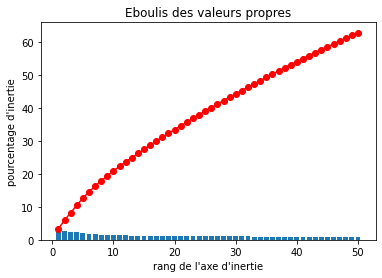

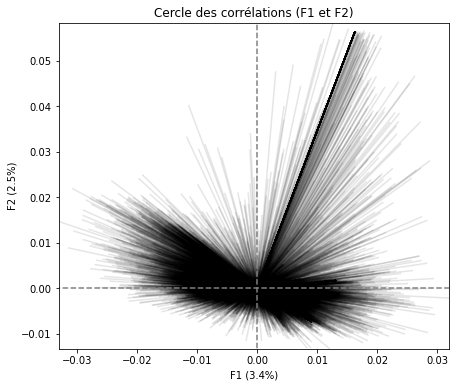

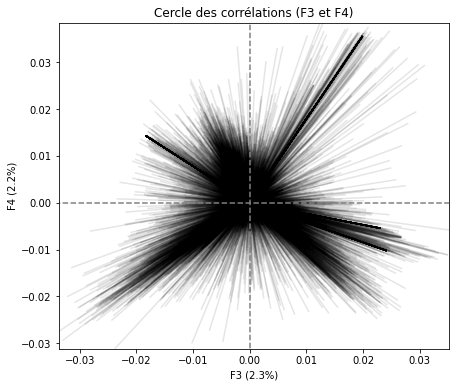

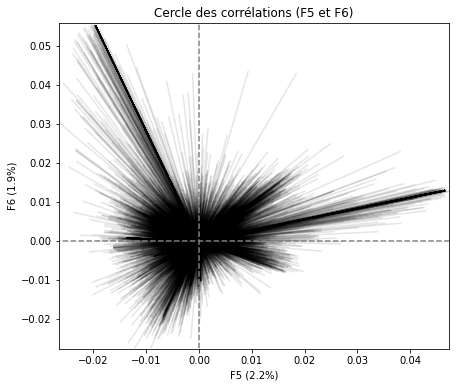

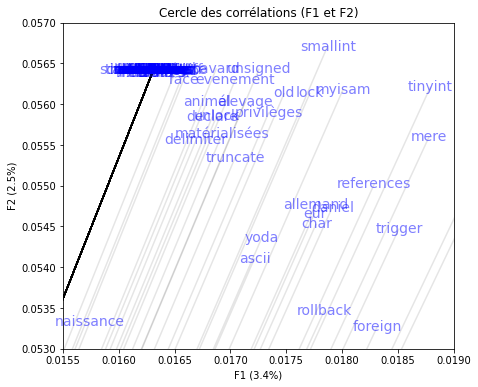

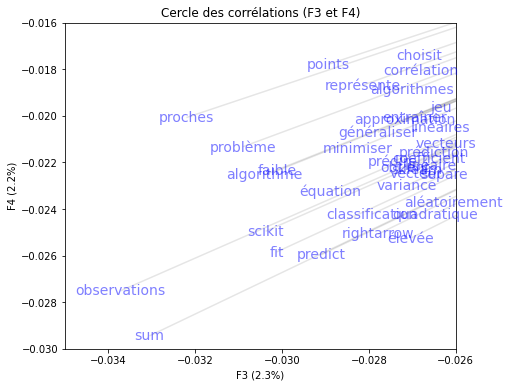

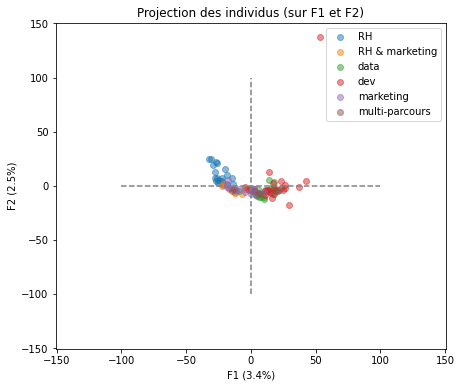

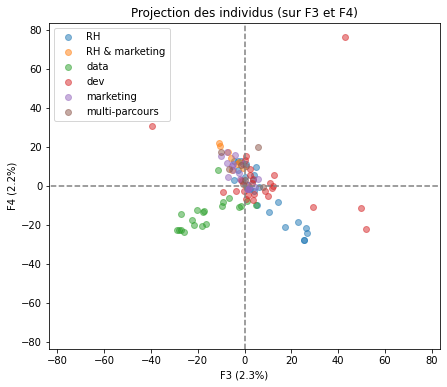

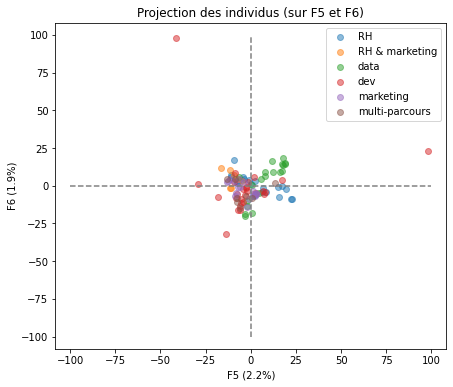

In [ ]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing 
#from functions import *   elles sont là au dessus

# choix du nombre de composantes à calculer
n_comp = 50

# import de l'échantillon et des informations relatives aux cours
bag_of_words_filepath = os.path.join(data_dir, 'bag_of_words.csv')
data = pd.read_csv(bag_of_words_filepath, index_col=0)
courses_info_filepath = os.path.join(data_dir, 'courses_info.csv')
courses_info = pd.read_csv(courses_info_filepath, index_col=0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]
# theme = []
# for course_id in data.index:
#  print(course_id)




# préparation des données pour l'ACP
X = data.values
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1), (2, 3), (4, 5)])
display_circles(pcs, n_comp, pca, [(0, 1)], lims=[.0155, .019, 0.053, .057], labels=np.array(features))
display_circles(pcs, n_comp, pca, [(2, 3)], lims=[-.035, -.026, -.03, -.016], labels=np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1), (2, 3), (4, 5)], illustrative_var=theme, alpha=0.5)

plt.show()


## PCA my courses

In [ ]:
print(os.getcwd())
print(os.path.exists(data_dir))
!ls -la '{data_dir}'
my_courses_path = os.path.join(data_dir, 'my_courses.csv')
display(pd.read_csv(my_courses_path, decimal='.', index_col=0))

/content
True
total 6813
-rw------- 1 root root 6693263 Aug  8 06:14 bag_of_words.csv
-rw------- 1 root root    1433 Aug 11 05:52 my_courses.csv
-rw------- 1 root root  281471 Aug  8 06:19 mystery.csv


,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Réalisez_une_analyse_exploratoire_de_données,4,48,0,15,2,19,1,2,94,4525281
Objectif_IA_:_initiez-vous_à_l'intelligence_artificielle,28,100,0,6,1,10,1,3,220,6417031
Initiez-vous_au_Machine_Learning,14,100,0,10,2,15,1,3,218,4011851
Améliorez_l'impact_de_vos_présentations,31,100,0,8,2,12,1,2,143,3013891
Gérez_du_code_avec_Git_et_GitHub,29,100,0,6,1,13,1,3,84,7162856
Nettoyez_et_analysez_votre_jeu_de_données,37,87,0,10,1,19,1,4,63,7410486
Gérez_votre_temps_efficacement,35,100,0,12,1,12,1,4,405,5944991
Initiez-vous_au_Design_Thinking,31,40,0,8,1,12,1,3,34,7231661
Mettez_en_place_un_système_de_veille_informationnelle,31,15,0,4,1,10,1,3,36,4805776


array([[  4,  48,   0,  15,   2,  19,   1,   2],
       [ 28, 100,   0,   6,   1,  10,   1,   3],
       [ 14, 100,   0,  10,   2,  15,   1,   3],
       [ 31, 100,   0,   8,   2,  12,   1,   2],
       [ 29, 100,   0,   6,   1,  13,   1,   3],
       [ 37,  87,   0,  10,   1,  19,   1,   4],
       [ 35, 100,   0,  12,   1,  12,   1,   4],
       [ 31,  40,   0,   8,   1,  12,   1,   3],
       [ 31,  15,   0,   4,   1,  10,   1,   3],
       [ 31,   0,   0,  12,   1,  18,   1,   3],
       [ 37, 100,   0,   6,   1,   7,   1,   2],
       [ 40, 100,   0,   6,   1,  13,   1,   4],
       [ 39, 100,   0,   8,   2,  13,   1,   3],
       [ 40, 100,   0,   6,   1,  11,   1,   3],
       [ 44, 100,   0,   6,   1,  19,   1,   4],
       [ 41, 100,   0,   6,   1,  19,   1,   4],
       [431,   6,   0,   4,   1,  15,   1,   3],
       [463, 100,   0,   4,   2,  23,   1,   4]])

StandardScaler()

scale : [130.87054201  36.10666639   1.           3.00257091   0.44790321
   4.08550585   1.           0.68718427]
mean : [78.11111111 77.55555556  0.          7.61111111  1.27777778 14.44444444
  1.          3.16666667]
var : [1.71270988e+04 1.30369136e+03 0.00000000e+00 9.01543210e+00
 2.00617284e-01 1.66913580e+01 0.00000000e+00 4.72222222e-01]
n_features_in_ : 8
n_samples_seens_ : 18


array([[-0.5662933 , -0.81856229,  0.        ,  2.46085408,  1.61245155,
         1.115053  ,  0.        , -1.69774938],
       [-0.38290596,  0.62161497,  0.        , -0.53657721, -0.62017367,
        -1.08785659,  0.        , -0.24253563],
       [-0.48988191,  0.62161497,  0.        ,  0.79561448,  1.61245155,
         0.13598207,  0.        , -0.24253563],
       [-0.35998255,  0.62161497,  0.        ,  0.12951864,  1.61245155,
        -0.59832112,  0.        , -1.69774938],
       [-0.37526483,  0.62161497,  0.        , -0.53657721, -0.62017367,
        -0.35355339,  0.        , -0.24253563],
       [-0.31413571,  0.26157066,  0.        ,  0.79561448, -0.62017367,
         1.115053  ,  0.        ,  1.21267813],
       [-0.32941799,  0.62161497,  0.        ,  1.46171032, -0.62017367,
        -0.59832112,  0.        ,  1.21267813],
       [-0.35998255, -1.04012802,  0.        ,  0.12951864, -0.62017367,
        -0.59832112,  0.        , -0.24253563],
       [-0.35998255, -1.73252094

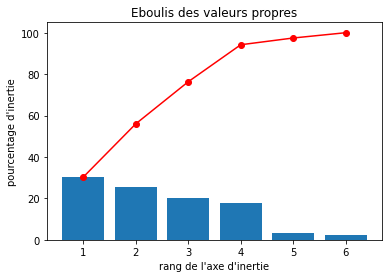

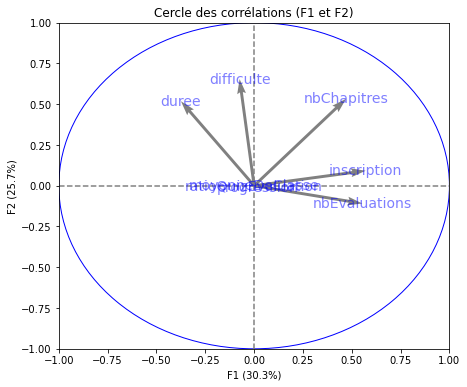

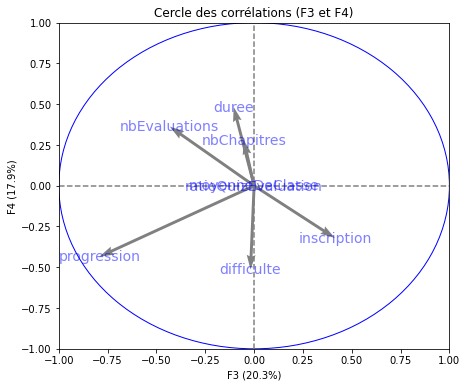

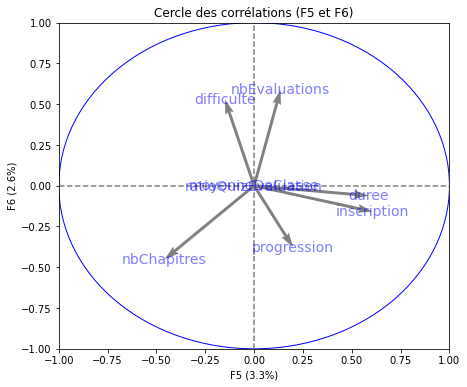

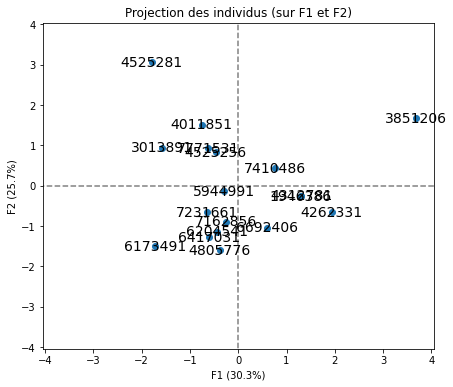

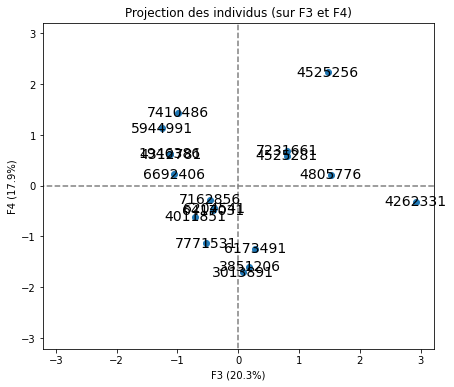

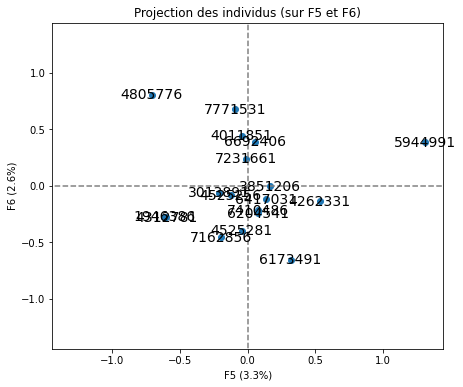

In [ ]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
# from functions import *

# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
my_courses_path = os.path.join(data_dir, 'my_courses.csv')
data = pd.read_csv(my_courses_path, decimal='.', index_col=0)

# selection des colonnes à prendre en compte dans l'ACP
cols = ['inscription', 'progression', 'moyenneDeClasse', 'duree', 'difficulte']
cols += ['nbChapitres', 'ratioQuizEvaluation', 'nbEvaluations']
data_pca = data[cols]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values

display(X)

names = data['idCours'] # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
display(std_scale)
print('scale :', std_scale.scale_)
print('mean :', std_scale.mean_)
print('var :', std_scale.var_)
print('n_features_in_ :', std_scale.n_features_in_)
print('n_samples_seens_ :', std_scale.n_samples_seen_)

X_scaled = std_scale.transform(X)
display(X_scaled)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1), (2, 3), (4, 5)], labels=np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1), (2, 3), (4, 5)], labels=np.array(names))

plt.show()

## PCA Mystery

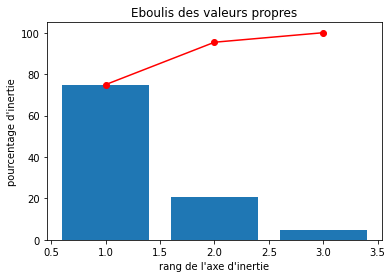

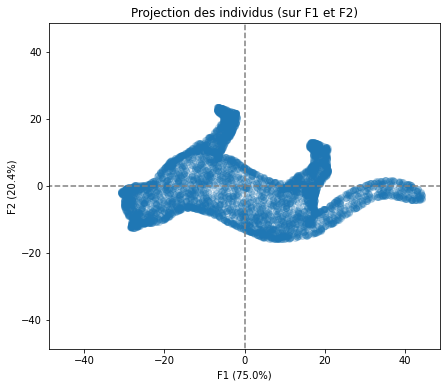

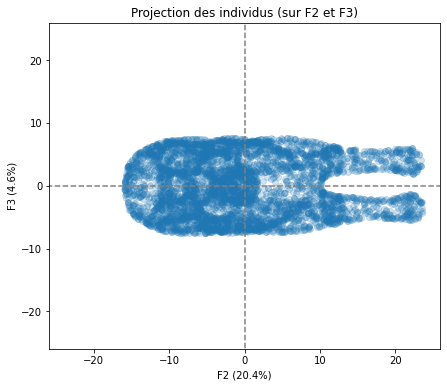

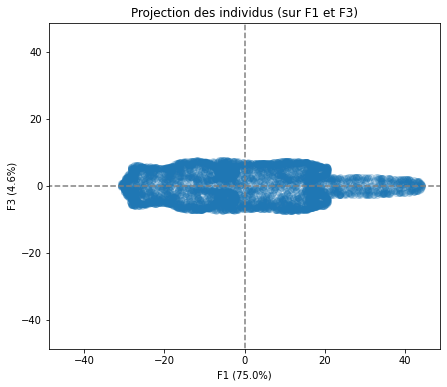

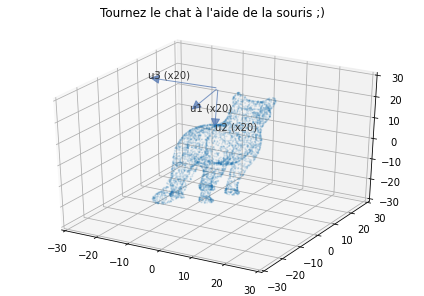

In [ ]:
import pandas as pd
from sklearn import decomposition, preprocessing
# from functions import *


# choix du nombre de composantes à calculer
n_comp = 3

# import de l'échantillon
mystery_filepath = os.path.join(data_dir, 'mystery.csv')

data = pd.read_csv(mystery_filepath)   # "mystery.csv")
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité. 
# On se contente juste de centrer les données, ce qui est obligatoire pour une ACP.
X = preprocessing.StandardScaler(with_std=False).fit_transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X)

# Eboulis des valeurs propres
display_scree_plot(pca)

# projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)


#################################
############ En 3D ##############
#################################

from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
fig.tight_layout()
x, y, z = X.T
ax.scatter(x, y, z, alpha = 0.1, s=1)
plt.title("Tournez le chat à l'aide de la souris ;)")

# Affichage des vecteurs propres (axes principaux d'inertie)
pcs = pca.components_
for i in range(3):
    eigen_vector_x20 = pcs[i] * 20
    eigen_vector = Arrow3D([0, eigen_vector_x20[0]], [0, eigen_vector_x20[1]],[30, 30+eigen_vector_x20[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="#4c72b0", alpha=.7)
    ax.add_artist(eigen_vector)
    ax.text3D(eigen_vector_x20[0],eigen_vector_x20[1],30+eigen_vector_x20[2],"u{} (x20)".format(i+1), color="#333333")

plt.show()

# Ch. 3.

## Clustering

Intertie d'un groupe : $\sum\limits_{i=1}^n d\left(M_i, G\right)^2$

Intertie ou variable ou variation **intraclasse** :

$\frac{1}{n} \sum\limits_{l=1}^{k}\sum\limits_{i=1}^{n_l} d\left(M_i, G_l\right)^2$

On considère chaque groupe représenté par son centre d'inertie $G_l$ et pas sa masse $n_l$ et on détermine un centre de gravité interclasse et une intertie ou variance ou variation interclasse :

$\frac{1}{n} \sum\limits_{i=1}^n n_ld\left(G_l, G_I\right)^2$

Le but du clustering : intertie intraclasse faible et interclasse forte (points resserrés au sein d'un groupes, et groupes éloignés les uns des autres).


Ces deux critères sont équivalents : minimiser l'un est la même chose que maximiser l'autre. En effet, intertie totale = inertie intraclasse + intertie interclasse et l'inertie totale est indépendante de la partition. C'est le théorème de Huygens ou équition d'analyse de la variance : https://fr.wikipedia.org/wiki/Analyse_de_la_variance

Comment trouver : k-means.

